<a href="https://colab.research.google.com/github/ASGKJune/junebot/blob/main/Insurance_dataset_ASGK_22Sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Forecast by using Linear Regression

## Challenge

* An insurance provider in United States wants to estimate the insurance cost of an individual given certain factors.
* In United States, it is often mandatory to inform the insurance provider about the ailments, BMI, whether a person is smoker or not, number of dependents, the region that they belong to, etc.
* Your job as a data scientist is to figure out, which factors end up costing more to the insurance providers.

## Data description

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

## Business Metrics

* Minimise the cost incurred on the insurance provider.
* Understand risky customers.

## Setup and Data Preparation:
- Import necessary libraries such as `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.  
- Load the dataset for regression analysis.  
- Conduct exploratory data analysis (EDA) to understand the dataset.  
- Preprocess the data by handling missing values, encoding categorical variables, and normalizing/standardizing features if needed.  

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Reading the file
df = pd.read_csv("insurance.csv")

In [ ]:
# Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Checking for Null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
#Checking for duplicates
duplicated = df[df.duplicated()]
print(duplicated)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
#Checking whether the same row is dupliacted and look at the other row which is same
df.loc[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
#Dropping the duplicated row
df.drop_duplicates(keep='last', inplace=True)

In [ ]:
#Checking whether the duplicated row has been dropped
df.loc[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


In [ ]:
#Having the statistical insight of the dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


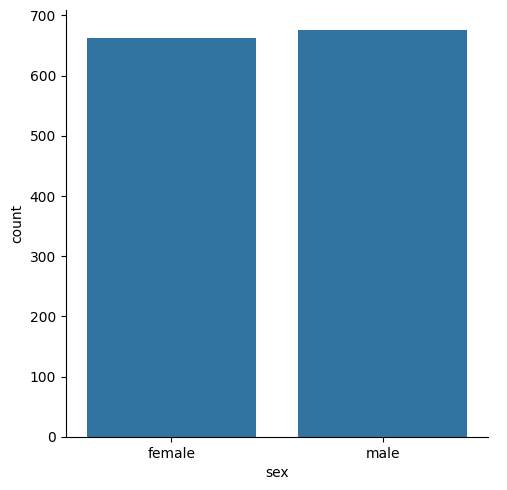

In [ ]:
#Working with categorical data
sns.catplot(df, x="sex", kind="count")

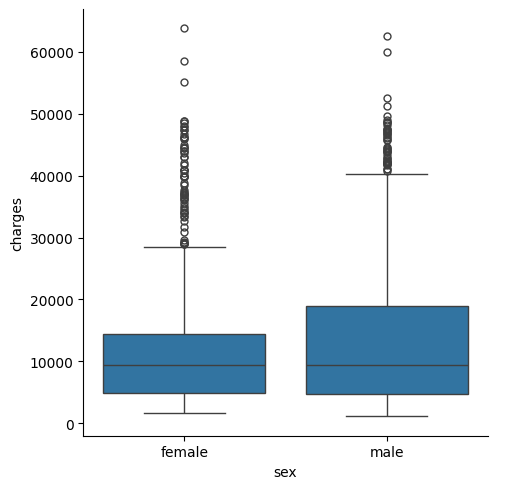

In [ ]:
#Checking the categorical feature with a numericall feature
sns.catplot(df, x="sex", y="charges", kind="box")

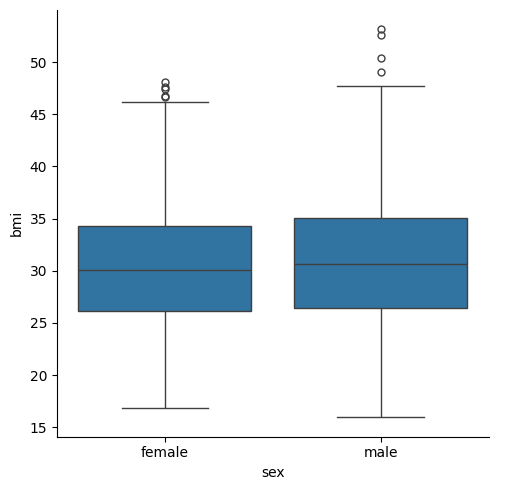

In [ ]:
sns.catplot(df, x="sex", y="bmi", kind="box")

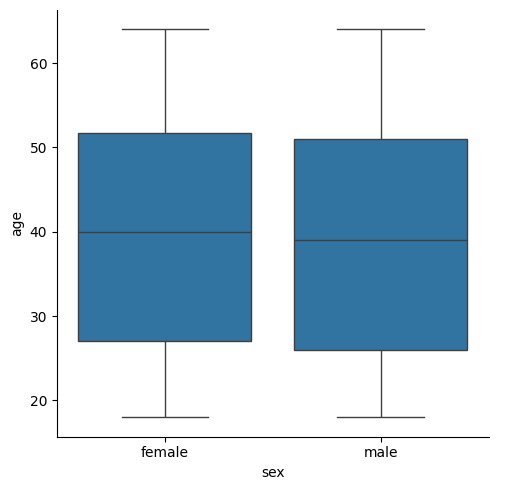

In [ ]:
sns.catplot(df, x="sex", y="age", kind="box")

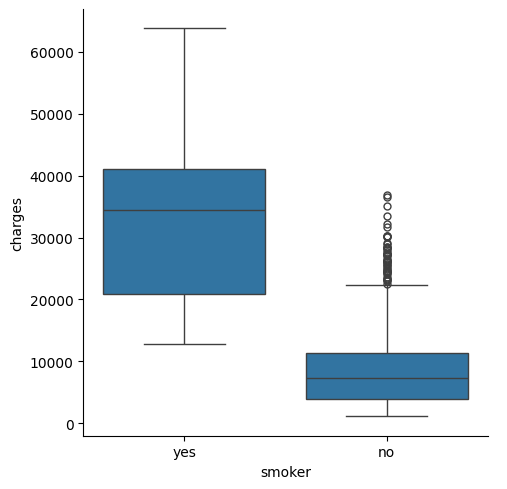

In [ ]:
sns.catplot(df, x="smoker", y="charges", kind="box")

* The smokers are paying a higher insurance cost than the non-smokers. Though the non-smokers are paying a lower insurance cost, some individuals are paying higer insurance cost, indicating that they might have some other ailments.

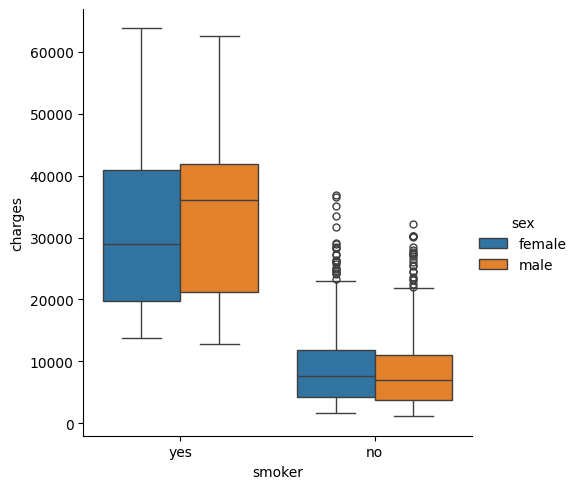

In [ ]:
sns.catplot(df, x="smoker", y="charges", hue="sex", kind="box")

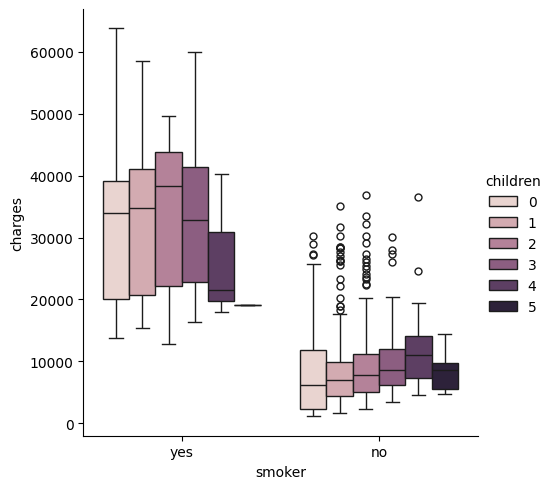

In [ ]:
sns.catplot(df, x="smoker", y="charges", hue="children", kind="box")

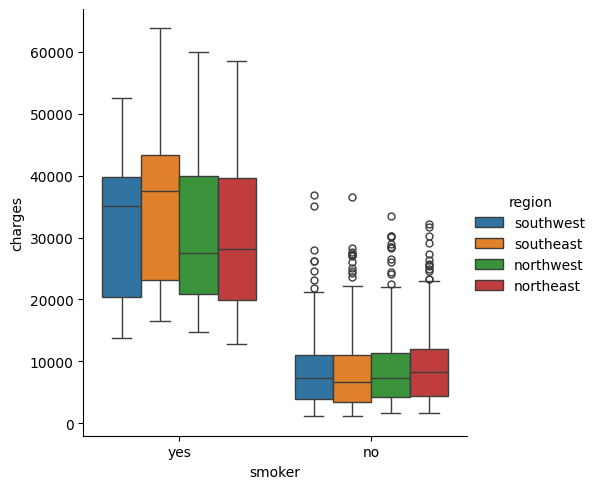

In [ ]:
sns.catplot(df, x="smoker", y="charges", hue="region", kind="box")

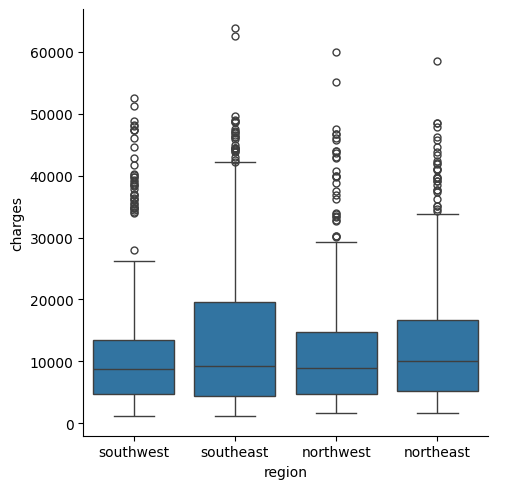

In [ ]:
sns.catplot(df, x="region", y="charges", kind="box")

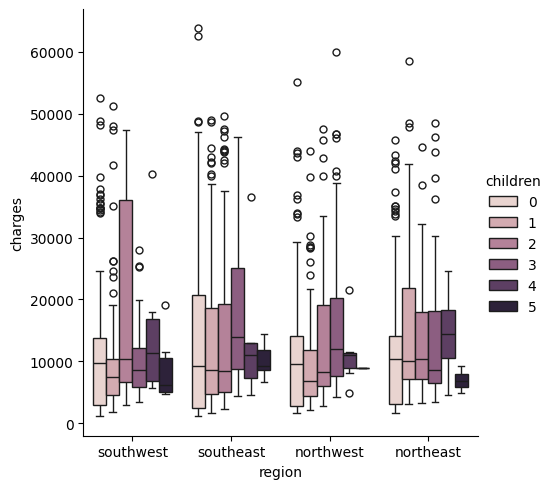

In [ ]:
sns.catplot(df, x="region", y="charges", hue="children", kind="box")

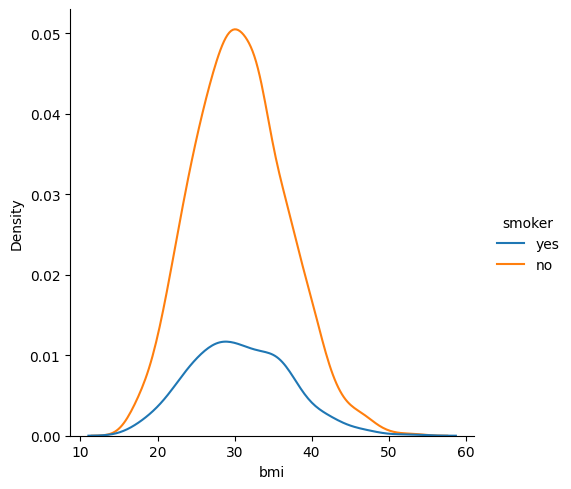

In [ ]:
sns.displot(df, x="bmi", hue="smoker", kind="kde")


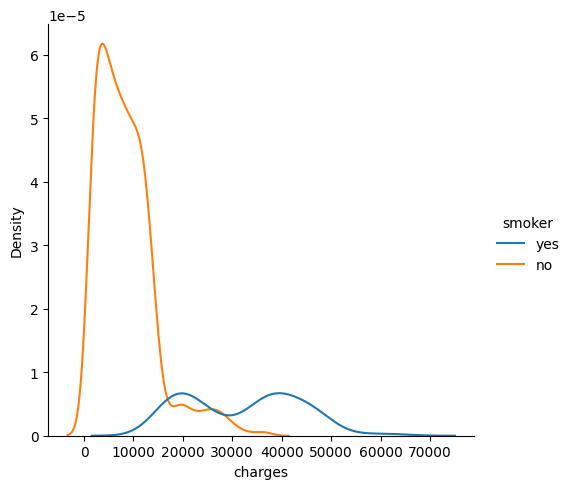

In [ ]:
sns.displot(df, x="charges", hue="smoker", kind="kde")

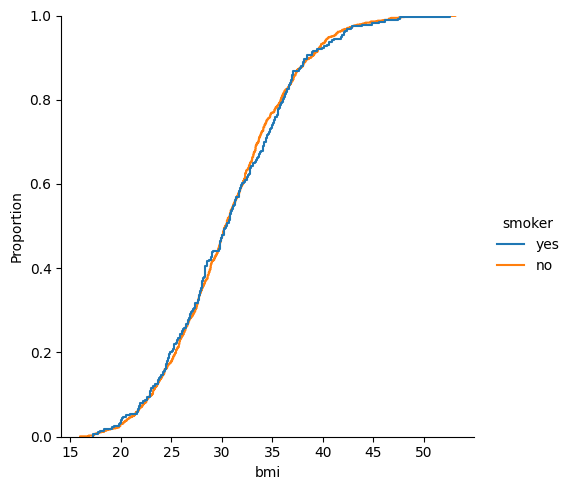

In [ ]:
sns.displot(df, x="bmi", hue="smoker", kind="ecdf")

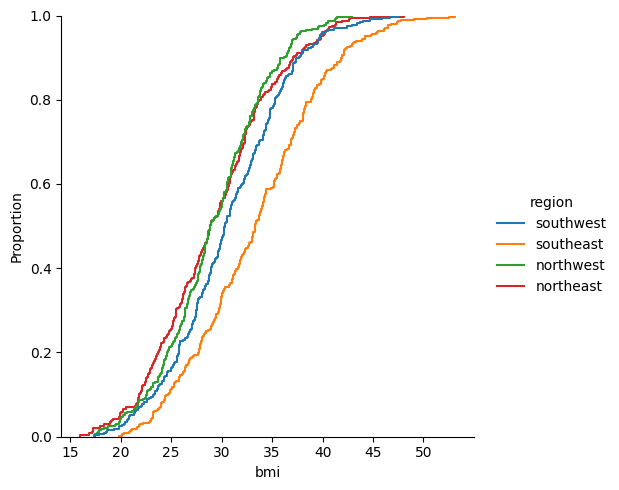

In [ ]:
sns.displot(df, x="bmi", hue="region", kind="ecdf")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


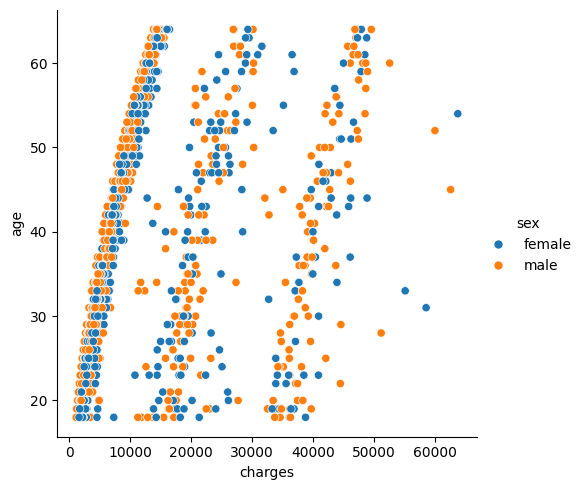

In [ ]:
sns.relplot(df, x="charges", y="age", hue="sex")

* We will plot x as age and y as charges, as y is dependent variable.

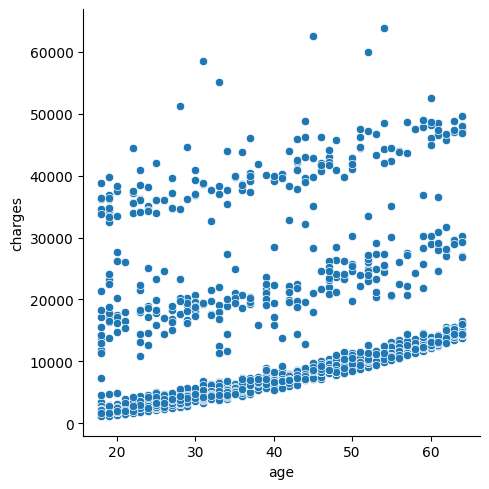

In [ ]:
sns.relplot(df, x="age", y="charges")

* As we are getting not very clear picture, even after adding the gender, so we should change the x and y and look at other possibilities.

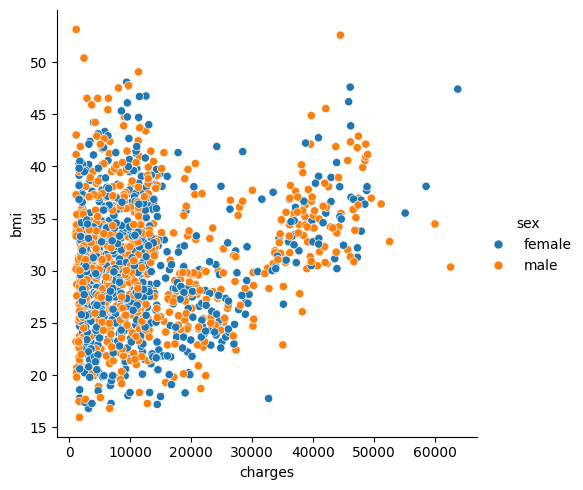

In [ ]:
sns.relplot(df, x="charges", y="bmi", hue="sex")

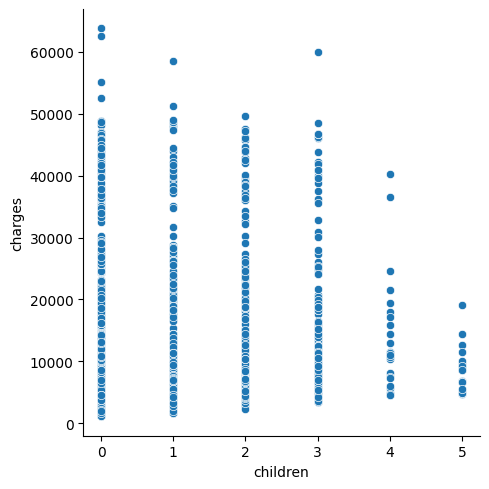

In [ ]:
sns.relplot(df, x="children", y="charges")

* This is normal, as people with 0 children wil pay more charges.

In [ ]:
#Checking the correlation between the columns.
df.corr()

ValueError: could not convert string to float: 'female'

In [ ]:
#Removing categorical data.
df_numerical = df.select_dtypes(include=['float64', 'int64'])
df_numerical.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [ ]:
df_categorical = df.select_dtypes(include=['object'])
print(df_categorical)

         sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1337 rows x 3 columns]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Converting categorical data into numerical
categorical_encoded = OneHotEncoder().fit_transform(df_categorical)
print(categorical_encoded)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4011 stored elements and shape (1337, 8)>
  Coords	Values
  (0, 0)	1.0
  (0, 3)	1.0
  (0, 7)	1.0
  (1, 1)	1.0
  (1, 2)	1.0
  (1, 6)	1.0
  (2, 1)	1.0
  (2, 2)	1.0
  (2, 6)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (3, 5)	1.0
  (4, 1)	1.0
  (4, 2)	1.0
  (4, 5)	1.0
  (5, 0)	1.0
  (5, 2)	1.0
  (5, 6)	1.0
  (6, 0)	1.0
  (6, 2)	1.0
  (6, 6)	1.0
  (7, 0)	1.0
  (7, 2)	1.0
  (7, 5)	1.0
  (8, 1)	1.0
  :	:
  (1328, 7)	1.0
  (1329, 0)	1.0
  (1329, 2)	1.0
  (1329, 6)	1.0
  (1330, 0)	1.0
  (1330, 2)	1.0
  (1330, 7)	1.0
  (1331, 0)	1.0
  (1331, 2)	1.0
  (1331, 7)	1.0
  (1332, 1)	1.0
  (1332, 2)	1.0
  (1332, 5)	1.0
  (1333, 0)	1.0
  (1333, 2)	1.0
  (1333, 4)	1.0
  (1334, 0)	1.0
  (1334, 2)	1.0
  (1334, 6)	1.0
  (1335, 0)	1.0
  (1335, 2)	1.0
  (1335, 7)	1.0
  (1336, 0)	1.0
  (1336, 3)	1.0
  (1336, 5)	1.0


In [ ]:
pd.get_dummies(df_categorical)

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,False,True,True,False,False,True,False,False
1334,True,False,True,False,True,False,False,False
1335,True,False,True,False,False,False,True,False
1336,True,False,True,False,False,False,False,True


In [ ]:
df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"])
print(df_encoded)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

* Since our data has outliers, ans as linear regression is affected by outliers, so we will use standard scalar for standardization, by Z-Score normalisation.

* Under normalisation, all the features will be scaled between 0 and 1 and and -1 and 1, the outliers will make those points skewed towards the higher values. Hence, the dataset will be skewed.

In [ ]:
# Split the pouplation data
from sklearn.model_selection import train_test_split

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

sc = std_scaler.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

* Train a simple linear regression model using the selected variables.
* Visualize the regression line on a scatter plot to show the relationship between the predictor and response variable.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)
train_score = reg.score(X_train_scaled, y_train)

In [ ]:
test_score  = reg.score(X_test_scaled, y_test)
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.7415933390033047
Test Score: 0.7640665675492984


In [ ]:
# Coefficients
feature_names = X.columns

coefs = pd.DataFrame(
    reg.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
age,3455.523759
bmi,2024.016725
children,742.148486
sex_female,40.865893
sex_male,-40.865893
smoker_no,-4708.396061
smoker_yes,4708.396061
region_northeast,287.541690
region_northwest,143.345353
region_southeast,-289.941954


4. Model Evaluation:
- Calculate evaluation metrics for both Simple and Multiple Linear Regression models:  
  - Mean Squared Error (MSE)  
  - Mean Absolute Error (MAE)  
  - R-squared (R²)  
  - Adjusted R-squared (Adjusted R²)  
- Compare the performance of both models and justify the results.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test data
y_pred = reg.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 39849413.115957156
Mean Absolute Error (MAE): 4209.191711184477
R-squared (R2): 0.7640665675492984


In [ ]:
# Next write the code for OLS regression, then step 4, then 5 and 6.

In [ ]:
# Writing the OLS Regression Code
import statsmodels.api as sm

# Assuming df_encoded is your dataframe with the encoded data
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Convert boolean columns to integers (0s and 1s)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add a constant to the predictor variables for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:17:57   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -295.0121    430.721  

5. Residual Analysis:
- Perform residual analysis to validate the assumptions of Linear Regression:  
  - Linearity  
  - Homoscedasticity (constant variance)  
  - Independence of errors  
  - Normality of residuals  


In [ ]:
# Since there is a suggestion of multicollinearity, we are looking at Variance Inflation Factor (VIF) for the predictors.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

# Drop one column from each set of one-hot encoded variables to avoid perfect multicollinearity
X_vif = X.drop(['sex_female', 'smoker_no', 'region_northeast', 'const'], axis=1)


vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
            feature        VIF
0               age   7.696862
1               bmi  11.359739
2          children   1.810971
3          sex_male   2.001959
4        smoker_yes   1.261476
5  region_northwest   1.888020
6  region_southeast   2.265574
7  region_southwest   1.960750


# 6. Model Optimization:
- Identify and remove irrelevant or highly correlated predictors to improve the model's performance.  
- Assess the impact of feature selection on the R-squared and Adjusted R-squared values.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming df_encoded is your dataframe with the encoded data
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Convert boolean columns to integers (0s and 1s)
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add constant
X = sm.add_constant(X)

# ----- Function to calculate VIF -----
def calculate_vif(X, thresh=10.0):
    """Iteratively remove features with VIF > threshold."""
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                           for i in range(X.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif > thresh:
            drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
            if drop_feature == "const":   # never drop intercept
                print("High VIF in constant detected, keeping it.")
                break
            print(f"Dropping '{drop_feature}' with VIF={max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
        else:
            break
    return X, vif_data

# ----- Run VIF reduction -----
X_reduced, final_vif = calculate_vif(X, thresh=10.0)

print("\nFinal VIF values after dropping high-VIF features:")
print(final_vif)

# ----- Fit model again -----
model = sm.OLS(y, X_reduced).fit()
print(model.summary())

Dropping 'sex_female' with VIF=inf
Dropping 'smoker_no' with VIF=inf
Dropping 'region_northeast' with VIF=inf
High VIF in constant detected, keeping it.

Final VIF values after dropping high-VIF features:
            feature        VIF
0             const  35.504594
1               age   1.016794
2               bmi   1.106742
3          children   1.004017
4          sex_male   1.008944
5        smoker_yes   1.012100
6  region_northwest   1.517673
7  region_southeast   1.651779
8  region_southwest   1.529044
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Mon, 22 Sep 2025   Prob (F-statistic):               0.00
Time:                        14:30:53   Log-Likelihood:                -13538.
No. Observa

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: Runtim

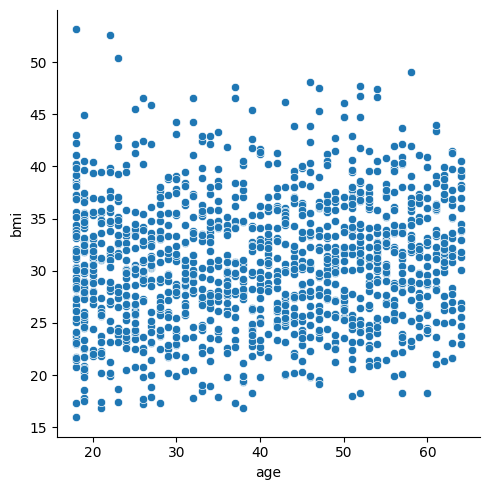

In [ ]:
# Since we got the VIF for age as more than 7 and VIF for bmi more than 11, so we are trying to understand for the relative plot, whether any relationship exists between the two attributes.

sns.relplot(df, x="age", y="bmi")

* From the above relative plot, we can say that there is no linear relationship between age and bmi.